In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
from plotnine import *

# Part 1 - Visualization of NYC Subway 'turnstile_weather' data

In [3]:
filename = "../data/turnstile_data_master_with_weather.csv"
df = pd.read_csv(filename)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131951 entries, 0 to 131950
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       131951 non-null  int64  
 1   UNIT             131951 non-null  object 
 2   DATEn            131951 non-null  object 
 3   TIMEn            131951 non-null  object 
 4   Hour             131951 non-null  int64  
 5   DESCn            131951 non-null  object 
 6   ENTRIESn_hourly  131951 non-null  float64
 7   EXITSn_hourly    131951 non-null  float64
 8   maxpressurei     131951 non-null  float64
 9   maxdewpti        131951 non-null  float64
 10  mindewpti        131951 non-null  float64
 11  minpressurei     131951 non-null  float64
 12  meandewpti       131951 non-null  float64
 13  meanpressurei    131951 non-null  float64
 14  fog              131951 non-null  float64
 15  rain             131951 non-null  float64
 16  meanwindspdi     131951 non-null  floa

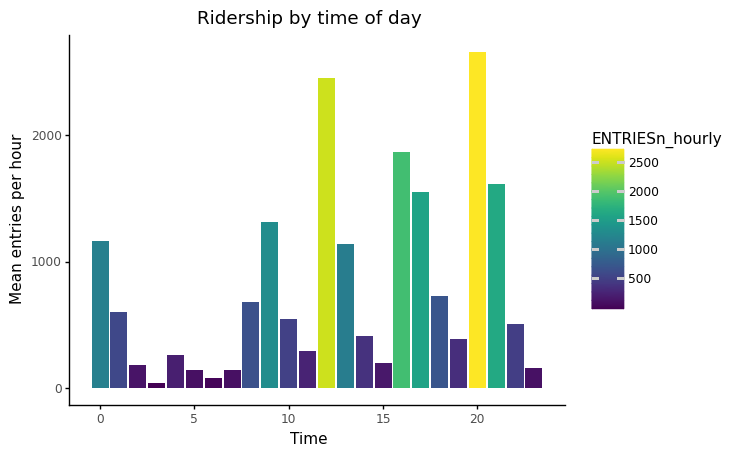

<ggplot: (-9223371876815326280)>

In [14]:
def plot_weather_data(turnstile_weather):
    '''Make a data visualization of 'turnstile_weather.
    
    We will investigate and illustrate the Ridership by time of day.
    '''
    df = pd.read_csv(turnstile_weather)
    mean_entries = df.groupby('Hour', as_index=False)['ENTRIESn_hourly'].mean()
    plot = ggplot(mean_entries, aes('Hour', 'ENTRIESn_hourly', fill='ENTRIESn_hourly')) + geom_col() + \
    ggtitle('Ridership by time of day') + xlab('Time') + ylab('Mean entries per hour') + theme_classic()
    return plot


filename = "../data/turnstile_data_master_with_weather.csv"
plot_weather_data(filename)

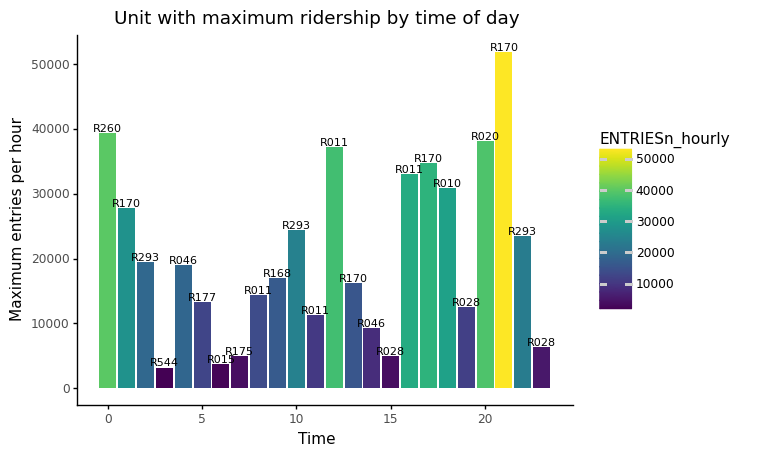

<ggplot: (-9223371876767718880)>

In [62]:
def plot_weather_data(turnstile_weather):
    '''Make a data visualization of 'turnstile_weather.
    
    We will investigate and illustrate which stations have more exits or entries at different times of day.
    '''
    df = pd.read_csv(turnstile_weather)
    
    grouped = df.groupby('Hour')
    max_entries_indices = grouped['ENTRIESn_hourly'].idxmax()
    
    max_entries = df.loc[max_entries_indices]
                                                 
    plot = ggplot(max_entries, aes('Hour', 'ENTRIESn_hourly', fill='ENTRIESn_hourly')) + geom_col() + \
        geom_text(aes(label='UNIT'), color='black', size=8, va='bottom') + \
        ggtitle('Unit with maximum ridership by time of day') + \
        xlab('Time') + ylab('Maximum entries per hour') + theme_classic()
    return plot


filename = "../data/turnstile_data_master_with_weather.csv"
plot_weather_data(filename)